In [1]:
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

Using TensorFlow backend.


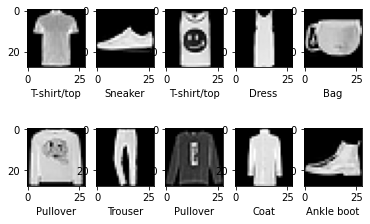

In [2]:
import numpy as np
import matplotlib.pyplot as plt

dict_items = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:	'Coat',
              5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

run = np.random.randint(1, 1000, 10)
fig = plt.figure()
i = 1
for r in run:
  plt.subplot(2, 5, i)
  i += 1
  plt.imshow(x_train[r],cmap = 'gray')
  plt.xlabel(dict_items[y_train[r]])

In [3]:
# Preprocess data

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,BatchNormalization,Flatten,Dropout
from keras.optimizers import adam

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

input_shape = x_train.shape[1:]

model = Sequential()

model.add(Conv2D(16,
                 kernel_size=(3,3),
                 activation = 'relu',
                 input_shape = input_shape))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32,
                 kernel_size=(3,3),
                 activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,
                 kernel_size=(3,3),
                 activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.20))

model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.20))

model.add(Dense(10,activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 5, 5, 32)          128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)         

In [6]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(monitor = 'val_accuracy',
                   min_delta = 0,
                   patience = 4,
                   verbose = 1,
                   mode ='max',
                   restore_best_weights = True)

rp = ReduceLROnPlateau(monitor='val_accuracy',
                       factor = 0.2,
                       patience = 4,
                       mode ='max',
                       verbose =1,
                       min_delta = 0.0001)

batch_size = 16
epochs = 20
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs = epochs,
                    verbose=1, 
                    validation_data=(x_test,y_test),
                    callbacks = [es])

score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss',score[0])
print('Test accuracy',score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 39s 645us/step - loss: 0.7611 - accuracy: 0.7527 - val_loss: 0.4830 - val_accuracy: 0.8257
Epoch 2/20
60000/60000 [==============================] - 35s 586us/step - loss: 0.4774 - accuracy: 0.8376 - val_loss: 0.3821 - val_accuracy: 0.8606
Epoch 3/20
60000/60000 [==============================] - 34s 575us/step - loss: 0.4262 - accuracy: 0.8530 - val_loss: 0.3591 - val_accuracy: 0.8671
Epoch 4/20
60000/60000 [==============================] - 34s 574us/step - loss: 0.3911 - accuracy: 0.8650 - val_loss: 0.3502 - val_accuracy: 0.8672
Epoch 5/20
60000/60000 [==============================] - 34s 567us/step - loss: 0.3737 - accuracy: 0.8715 - val_loss: 0.3508 - val_accuracy: 0.8727
Epoch 6/20
60000/60000 [==============================] - 34s 567us/step - loss: 0.3575 - accuracy: 0.8766 - val_loss: 0.3230 - val_accuracy: 0.8809
Epoch 7/20
60000/60000 [==============================] 

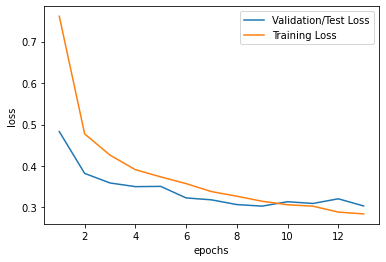

In [8]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

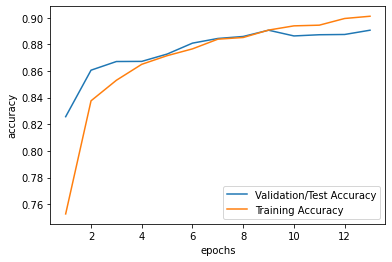

In [9]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

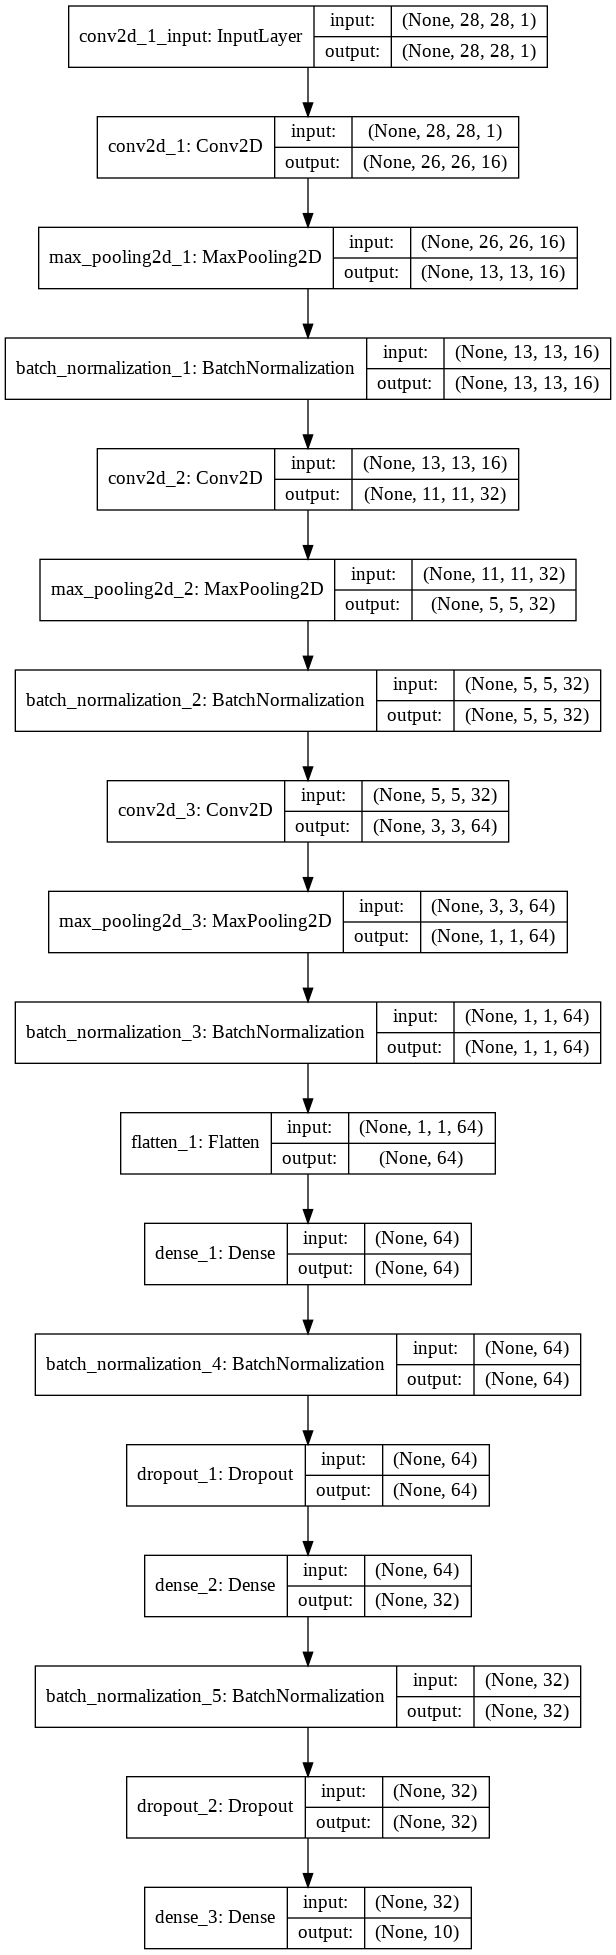

In [10]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)